### **Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

# 🏦 **BANK MARKETING CAMPAIGN CLASSIFICATION**

### `Initial Setup`

In [1]:
# Import library eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import library modeling


import warnings
warnings.filterwarnings('ignore')

### `Business Problem Understanding`

#### **Problem Statement**

##### **Stakeholder** 
   - Bank's Marketing Manager 
   - Bank's Marketing Team.

##### **Problem**
   
   Permasalahan dari analisis ini terkait deposito nasabah. Deposito merupakan salah satu produk dari bank di mana nasabah akan menyimpan uangnya di bank, namun untuk mencairkannya harus sesuai dengan jangka waktu yang telah ditentukan di awal. Sebagai konsekuensinya, nasabah akan mendapatkan bunga yang dilihat dari total uang yang didepositokan

   Sebagai lembaga keuangan, bank tidak boleh kehilangan nasabah deposito karena dapat mengurangi aset pada bank. Selain itu, bank juga harus mencari nasabah lain untuk membuka rekening deposito. Ketika jumlah saldo deposito meningkat, maka meningkatkan juga nominal pinjaman yang dapat diberikan kepada nasabah. Dan bank akan mendapatkan keuntungan dari bunga pinjaman tersebut. Sehingga dapat dikatakan ketika saldo deposito meningkat juga dapat meningkatkan keuntungan dari bank.
   
   Untuk sampai saat ini, pihak bank masih menilai secara manual akan nasabah yang diprediksi ingin membuka rekening deposito dan tidak ingin membuka rekening deposito. Misalkan ada total sebuah bank memiliki nasabah sejumlah 100.000 orang, dengan penilaian manual maka akan cenderung meningkatkan subjektivitas dikarenakan keterbatasan jumlah sdm. Selain itu, metode manual juga riskan terhadap kesalahan prediksi. Dan jika masih menggunakan metode manual untuk memprediksi, jika dalam satu bank hanya memiliki 20 orang marketing dan dalam 1 harinya secara efektif bisa menemukan lalu menghubungi 10 orang nasabah yang berpotensi maka akan membutuhkan waktu 500 hari. Maka dari analisis ini, pihak bank ingin mencari kategori kandidat calon nasabah yang diprediksi ingin membuka rekening deposito.

**Goals**

Dilihat dari permasalahannya, pihak bank ingin mencari kategori kandidat calon nasabah yang ingin melakukan deposito. Sehingga marketing yang akan dilakukan dapat fokus terhadap calon nasabah yang potensial (nasabah yang ingin membuka rekening deposito) untuk membuka deposito. 

Untuk itu, pihak bank membentuk suatu pola machine learning untuk mengetahui nasabah tersebut berpotensi untuk membuka rekening deposito atau tidak, serta ingin mengetahui faktor-faktor/variabel apa saja yang dimiliki atau mempengaruhi seseorang agar ingin membuka rekening deposito atau tidak. Sehingga, pihak bank bisa mendekati kategori nasabah yang sesuai untuk membuka rekening deposito.

**Analytic Approach**

Kita akan menganalisis data untuk mencari pola machine learning yang bisa membedakan kategori nasabah yang ingin membuka deposito atau tidak.

Selanjutnya, kita akan membangun model klasifikasi yang akan membantu pihak bank untuk memprediksi probabilitas nasabah ingin membuka rekening deposito atau tidak. 

**Metric Evaluation**

Target dari analisis dapat kita kategorikan:

0 : no (tidak ingin membuka rekening deposito)
<br>
1 : yes (ingin membuka rekening deposito)

**Type I Eror | False Positif**

Kondisi di mana nasabah terprediksi ingin membuka rekening deposito padahal kenyataannya tidak ingin membuka rekening deposito
**Konsekuensi** : Marketing yang dilakukan bank akan cenderung sia-sia karena tidak tepat sasaran

**Type II Eror | False Negatif**

Kondisi di mana nasabah terprediksi tidak ingin membuka rekening deposito padahal kenyataanya ingin membuka rekening deposito
**Konsekuensi** : Bank akan kehilangan keuntungan yang didapatkan dari nasabah potensial (Nasabah yang ingin membuka rekening deposito)


Sebagai gambaran dari konsekuensinya, maka kita akan mencoba menghitung dampak biaya dari asumsi tersebut:

- Jumlah orang yang tidak membuka rekening deposito 4081 orang *(sumber dari database)*
- Jumlah orang yang membuka rekenning deposito 3732 *(sumber dari database)*
- Biaya marketing untuk deposito rata-rata dari Bank adalah 1 - 3 % dari revenue [sumber](https://emiboston.com/leading-u-s-banks-boosted-marketing-spend-in-2022/)
- Minimal untuk pembukaan rekening deposito per orang sekitar $1,000 [sumber](https://www.forbes.com/advisor/banking/bank-account-minimum-deposit-minimum-balance-requirements/)
- rata-rata bunga deposito 5.77% [sumber](https://www.theglobaleconomy.com/rankings/deposit_interest_rate/)
- rata-rata bunga pinjaman 10.42% [sumber](https://www.theglobaleconomy.com/rankings/lending_interest_rate/#:~:text=Lending%20interest%20rate%20%2D%20Country%20rankings&text=The%20average%20for%202020%20based,was%20in%20Hungary%3A%201.96%20percent.)
- Revenue adalah 3732 x $1,000 = $3,732,000
- Biaya marketing adalah 1% dari $3,732,000 sehingga menghasilkan $37,320

***Untuk Type I Eror*** :

CPM *(Cost Per Marketing)* adalah perhitungan biaya marketing oleh bank per satu nasabah yang diukur dari 

$$ CPM =  \frac {Biaya\ Marketing}{Jumlah\ Total\ Nasabah} $$

Jika dilihat dari CPM bisa dikatakan Bank akan mengeluarkan biaya marketing per nasabah $4.77 . Sehingga ketika nasabah ternyata tidak ingin membuka rekening deposito, Bank akan menyia-nyiakan biaya marketing $4.77 per nasabah.

***Untuk Type II Eror***

Pihak bank akan mendapatkan keuntungan dari nominal pinjaman yang diberikan, nominal pinjaman yang diberikan dilihat dari aset yang salah satunya didapatkan dari bertambahnya deposito.

$$ Profit\ per\ nasabah = {(Bunga\ Pinjaman\ -\ Bunga\ Deposito)\ X\ Minimum\ Pembukaan\ Deposito } $$

Sehingga pihak Bank akan berpotensi kehilangan keuntungan yang didapatkan dari setiap nasabah yang membuka rekening deposito adalah $46.5 per nasabah.

Setelah mempertimbangkan hal-hal diatas, kami merasa bahwa type I eror dan type II eror sama pentingnya untuk diminimalisir, sehingga sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat memprediksi sebanyak mungkin ***kelas positif*** dan ***kelas negatif*** yang benar dan meminimalkan type I error dan type II error. Jadi, metric yang akan digunakan untuk analisis adalah `MCC (Matthew Correlation Coefficient)`.


### `Data Understanding`

Data berisi tentang karakteristik nasabah yang membuka rekening deposito dan tidak membuka rekening deposito. Dataset dapat didownload pada ***[download](https://drive.google.com/drive/folders/13lrEDlKfnTPNREfGLBaYGYf8dSjHBzfW)*** . Untuk penjelasan kolom bisa dilihat di bawah ini :

| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| age | the age of the customer |
| job | the job of the customer |
| balance | amount of money in a financial repository, such as a savings or checking account |
| housing | Is the customers has housing loan |
| loan | Is the customers has loan |
| contact | Contact communication type |
| month | Last contact month of the year |
| campaign | Number of contacts performed during this campaign and for this client |
| pdays | Number of days after the client was contacted from the previous campaign (numeric; -1 means client was not previously contacted) |
| poutcome | Outcome of the previous marketing campaign |
| deposit | Whether the customer deposits or not |

In [2]:
data = pd.read_csv(r'C:\Users\user\Documents\database purwadhika\Capstone_project 3\data\raw\data_bank_marketing_campaign.csv')
print(f'Jumlah baris dan kolom: {data.shape}')

data.sample(5)

Jumlah baris dan kolom: (7813, 11)


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
7309,57,blue-collar,3196,no,no,cellular,aug,4,-1,unknown,no
291,25,blue-collar,97,yes,no,unknown,may,1,-1,unknown,yes
1358,43,services,313,yes,no,cellular,may,2,-1,unknown,no
5471,78,retired,2787,no,no,telephone,jul,1,-1,unknown,yes
67,51,services,7,yes,no,cellular,jul,30,-1,unknown,no


Untuk syarat utama pembuatan deposito adalah adanya **kartu identitas** dan mempunyai **rekening simpanan ataupun giro di bank**. Kartu identitas sebagi syarat karena ketika sudah mempunyai kartu identitas maka seseorang dapat dinilai akan bisa bertanggung jawab kepada dirinya sendiri. Dan kepemilikan rekening simpanan atau giro menjadi syarat utama juga karena nantinya untuk ***sharing*** bunga deposito akan masuk ke dalam rekening tersebut. Kepemilikan kartu identitas dapat dimiliki dengan syarat berusia setidaknya **18 tahun** dan kepemilikan rekening simpanan atau giro bisa dibuktikan dengan adanya saldo rekening ***(balance)***. Sebelum melakukan analisis kita akan mengecek ketersediaan data umur ***(Age)*** dan data saldo rekening ***(balance)*** dalam dataset.

In [3]:
cols = ('age', 'balance')

for i in cols:
    if i in list(data.columns) and i == 'age' and data[i].unique().min() >= 18:
        print(f"Data {i} tersedia, dan umur nasabah pada dataset tidak ada yang kurang dari 18 tahun")
    elif i in list(data.columns) and i == 'balance':
        print(f"Data {i} tersedia")
    else:
        print("Data tidak tersedia")


Data age tersedia, dan umur nasabah pada dataset tidak ada yang kurang dari 18 tahun
Data balance tersedia


Selain dari pihak nasabah, untuk merubah keinginan nasabah yang tadinya tidak ingin membuka deposito dan akhirnya membuka rekening deposito, pihak bank juga perlu melakukan interaksi kepada nasabah dan sounding bahwa salah satu produk dari bank yang bisa dinikmati oleh nasabah adalah deposito. Untuk itu kita juga perlu mengecek ketersediaan data terkait **bagaimana bank menghubungi nasabah, berapa kali campaign yang ditawarkan ke pada nasabah, dan kapan terakhir nasabah dihubungi oleh bank**.

In [4]:
data.columns

Index(['age', 'job', 'balance', 'housing', 'loan', 'contact', 'month',
       'campaign', 'pdays', 'poutcome', 'deposit'],
      dtype='object')

Setelah kita melihat nama-nama kolom pada dataset, kita mendapat jawaban bahwa :
* bagaimana bank menghubungi nasabah ada pada kolom **contact**
* berapa kali campaign ditawarkan pada nasabah pada kolom **campaign**
* kapan terakhir nasabah dihubungi oleh bank pada kolom **month** dan **pdays**

Kita akan melakukan kuantifikasi pada kolom **job** terhadap deposit

<Axes: ylabel='job'>

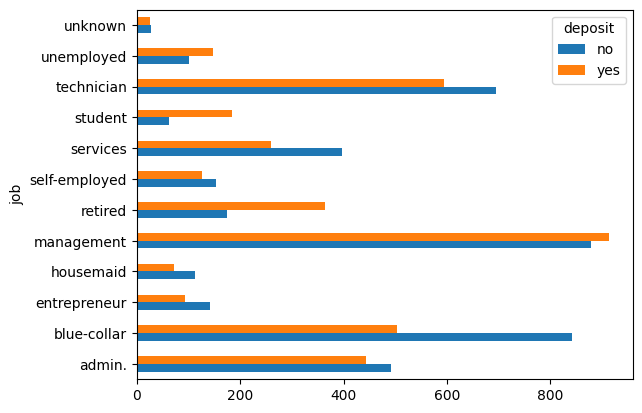

In [5]:
pd.crosstab(data['job'], data['deposit'], values=data['deposit'], aggfunc='count').plot(kind='barh')

__Insight__
<br>
Pada masing-masing **job** menunjukkan angka yang berbeda-beda jika dibandingkan dengan target (deposit), sehingga bisa dikatakan bahwa kategori **job** sedikit banyaknya juga dapat mempengaruhi seseorang untuk membuka rekening deposito

Kita akan melakukan kuantifikasi pada kolom **housing** terhadap deposit

<Axes: ylabel='housing'>

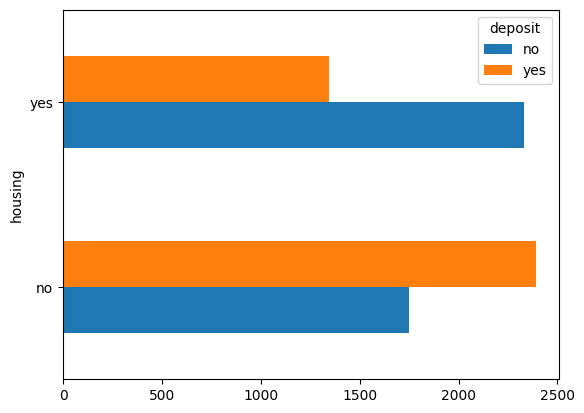

In [6]:
pd.crosstab(data['housing'], data['deposit'], values=data['deposit'], aggfunc='count').plot(kind='barh')

__Insight__
<br>
Dari data di atas bisa disimpulkan bahwa orang yang memiliki KPR/Hutang rumah cenderung tidak membuka rekening deposito. Dan orang yang tidak memiliki KPR/Hutang rumah cenderung membuka rekening deposito.

Kita akan melakukan kuantifikasi pada kolom **loan** terhadap deposit

<Axes: ylabel='loan'>

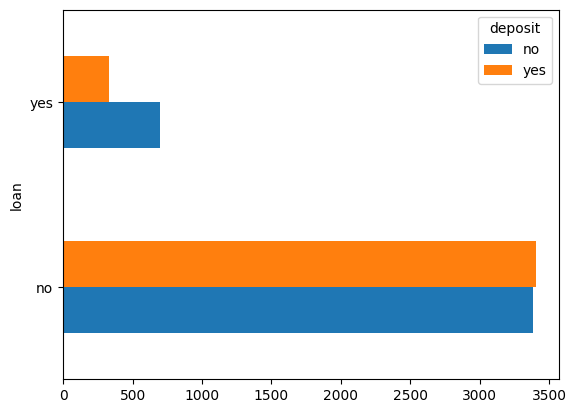

In [7]:
pd.crosstab(data['loan'], data['deposit'], values=data['deposit'], aggfunc='count').plot(kind='barh')

__Insight__
<br>
Jika dilihat dari kepemilikan hutang uang, orang yang tidak memiliki hutang uang tapi membuka rekening deposito jumlahnya hampir sama dengan orang yang tidak memiliki hutang uang tapi tidak membuka rekening deposito. Dan untuk orang yang memiliki hutang uang, cenderung tidak membuka rekening deposito.

Setelah melihat dari data yang tersedia, bisa dikatakan bahwa dataset bisa untuk menangani **business problem** dan **goals** dari analisis ini. 

#### **Initial Assesment**

In [8]:
pd.DataFrame({
    'column': data.columns.values,
    'type': data.dtypes.values,
    'n_unique': data.nunique().values,
    'min': data.min().values,
    'max': data.max().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,column,type,n_unique,min,max,sample_unique
0,age,int64,75,18,95,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,12,admin.,unknown,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,3153,-6847,66653,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,2,no,yes,"[no, yes]"
4,loan,object,2,no,yes,"[no, yes]"
5,contact,object,3,cellular,unknown,"[cellular, telephone, unknown]"
6,month,object,12,apr,sep,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,int64,32,1,63,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,422,-1,854,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,4,failure,unknown,"[unknown, other, failure, success]"


__Insight :__
* dataset terdiri dari 7813 baris dan 11 kolom
* dataset memiliki kolom numerikal berjumlah 4, dan kolom kategorikal yang berjumlah 7
* data type dari masing-masing kolom sudah sesuai
* pada kolom job, contact, dan poutcome terdapat value unknown yang perlu dihandle
* pada kolom pdays terdapat value -1 yang perlu dihandle 

#### **Numerical variable**

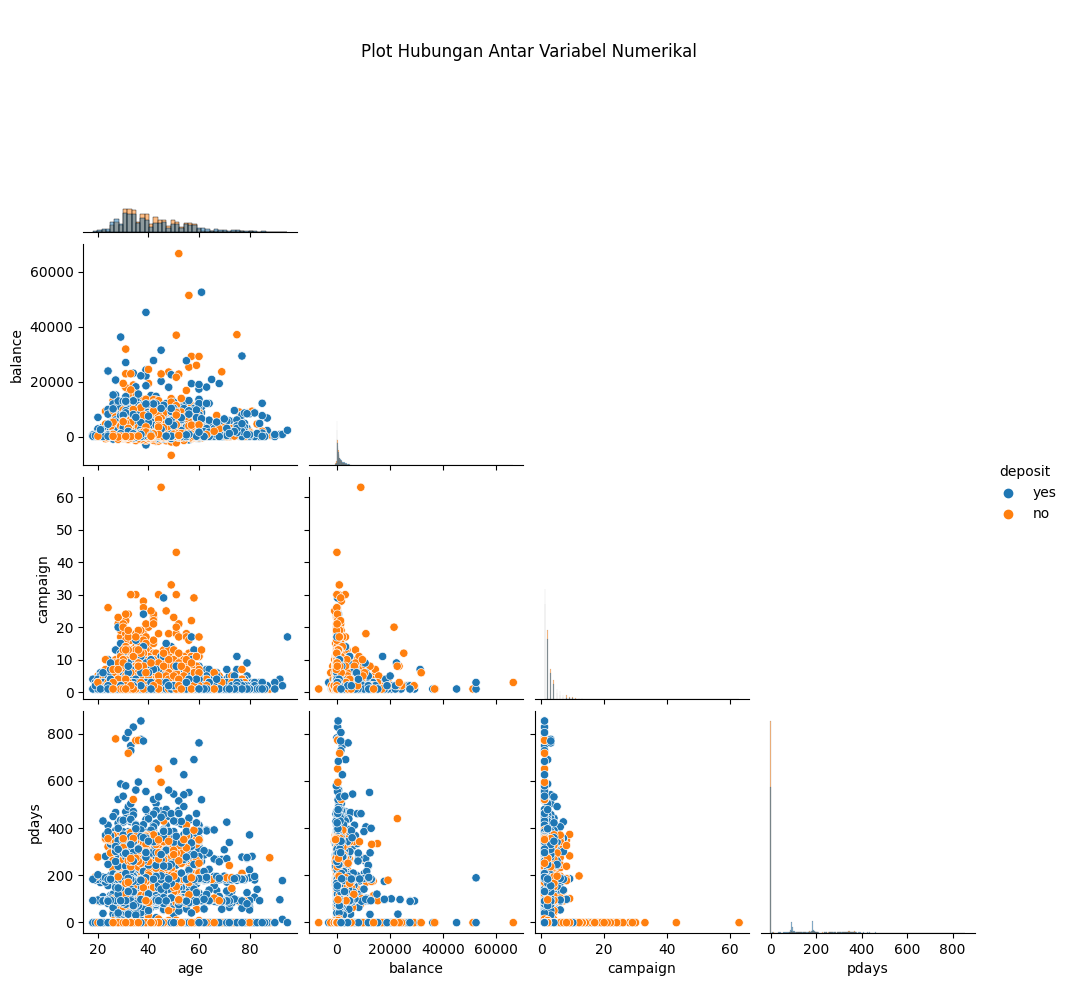

In [9]:
graph = sns.pairplot(data, corner=True, hue='deposit', diag_kind='hist')
graph.fig.suptitle("Plot Hubungan Antar Variabel Numerikal", y=0.95)
plt.show()


 - continou = age, balance
 - discrete = campaign, pdays


__Insight :__
* Distribusi data dari masing-masing variabel tidak normal
* Muncul mutlivariate outlier jika data dibandingkan dengan target (deposit)
* Sebaran data pada masing-masing variabel cenderung tinggi
* Skala nilai pada variabel balance lebih luas (puluhan ribu)

#### **Categorical variable**

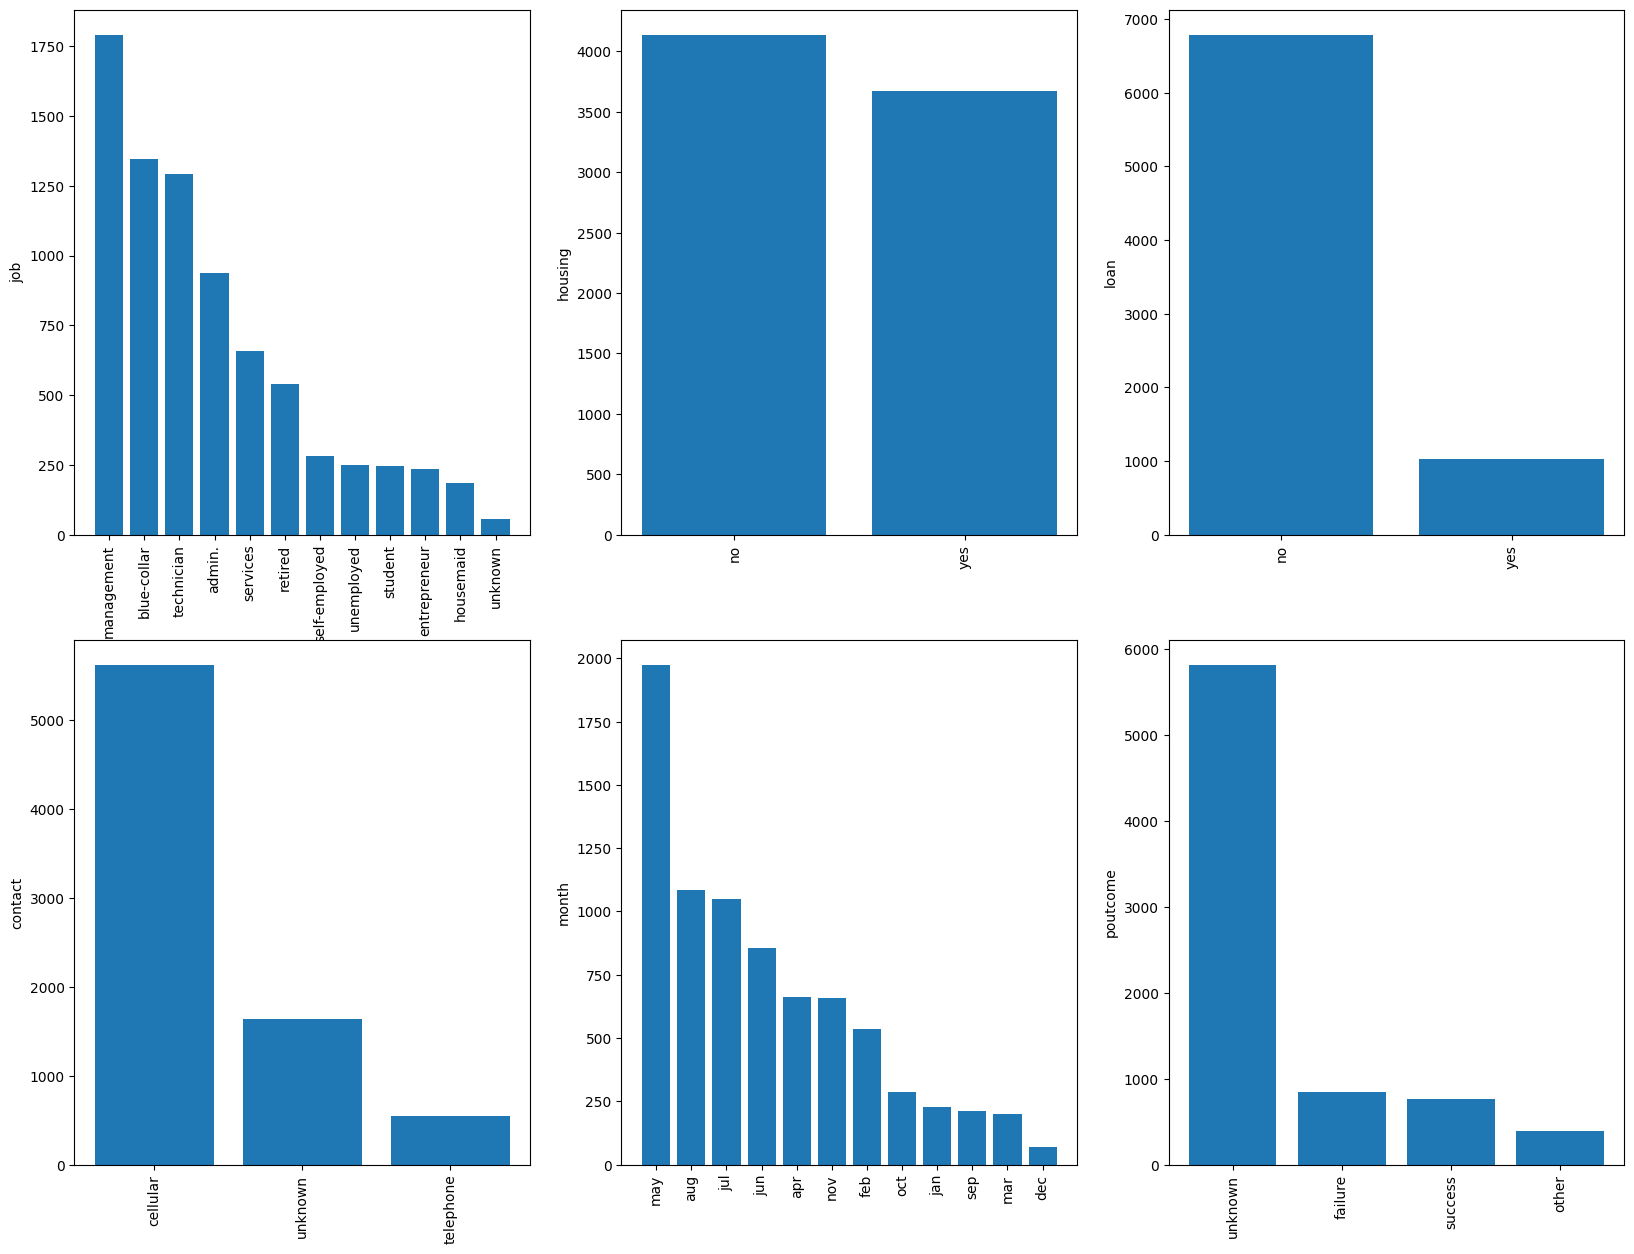

In [10]:
cat_columns = ['job', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_ylabel(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1
plt.show()

- ordinal = month
- nominal = job, housing, loan, contact, poutcome, deposit

__Insight :__
* terdapat 6 kolom variabel kategorikal
* pada kolom **job, contact, poutcome** terdapat value yang mendominasi. Nantinya akan dicheck secara rare value dan akan dihandle jika memang handling
* Pada kolom **job**, value management mendominasi yang berarti bahwa pekerjaan sebagai "management" memiliki ketertarikan yang tinggi untuk membuka rekening deposito
* Pada kolom **contact**, value celluler mendominasi yang berarti bahwa bank paling efektif menghubungi nasabah lewat handphone 

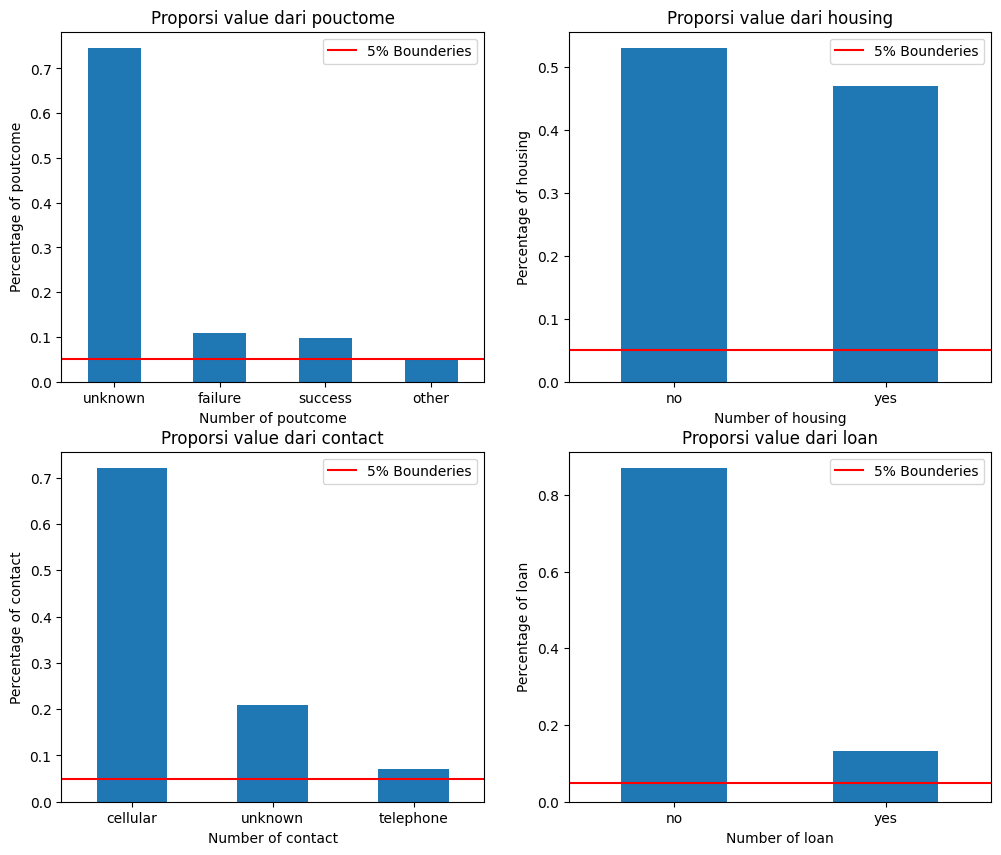

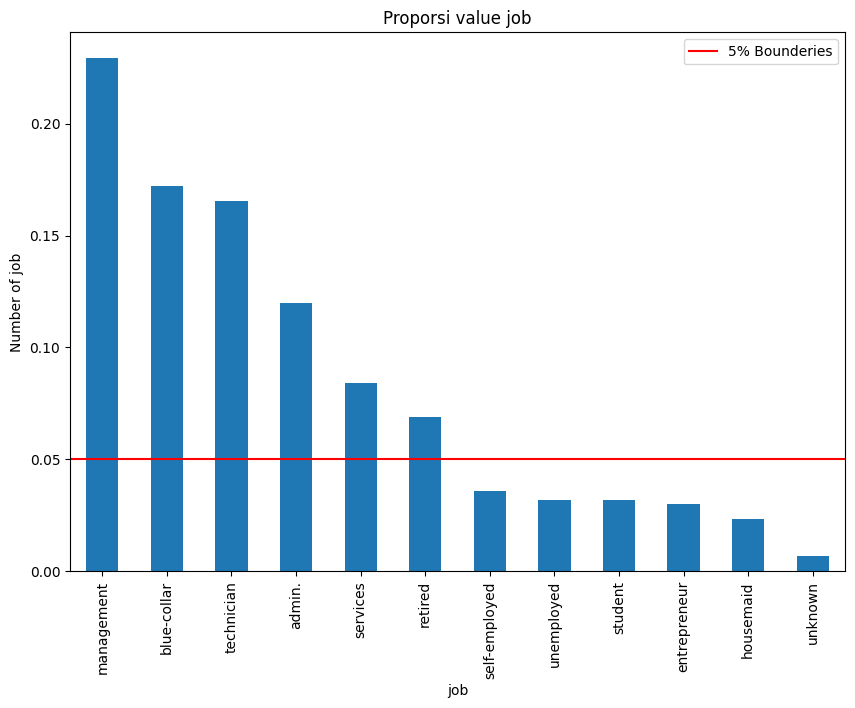

In [11]:
# kolom 'job', 'housing', 'loan', 'contact', 'month','poutcome'
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

row1 = [ax1,ax2]
row2 = [ax3,ax4]
col1 = ['poutcome', 'housing']
col2 = ['contact', 'loan']
title1 = ['Proporsi value dari pouctome','Proporsi value dari housing']
title2 = ['Proporsi value dari contact','Proporsi value dari loan']

for i in zip(row1, row2, col1, col2, title1, title2):
    # DataFrame
    temp_df1 = pd.Series(data[i[2]].value_counts() / len(data)).sort_values(ascending=False).plot(kind='bar', label='', ax=i[0])
    temp_df2 = pd.Series(data[i[3]].value_counts() / len(data)).sort_values(ascending=False).plot(kind='bar', label='', ax=i[1])
    # set title
    i[0].set_title(i[-2])
    i[1].set_title(i[-1])
    # horizontal line: boundary yang digunakan adalah 5%, di bawah 5% akan diasumsikan sebagai rare value
    i[0].axhline(y=0.05, color='red', label='5% Bounderies')
    i[1].axhline(y=0.05, color='red', label='5% Bounderies')
    # set x label and its rotation
    i[0].tick_params(axis='x', labelrotation=360)
    i[1].tick_params(axis='x', labelrotation=360)
    i[0].set_xlabel(f"Number of {i[2]}")
    i[1].set_xlabel(f"Number of {i[3]}")
    # ylabel
    i[0].set_ylabel(f'Percentage of {i[2]}')
    i[1].set_ylabel(f'Percentage of {i[3]}')
    # legend
    i[0].legend()
    i[1].legend()

# kolom job
# figure and title
plt.figure(figsize=(10, 7))
plt.title("Proporsi value job")
fig = pd.Series(data['job'].value_counts() / len(data)).sort_values(ascending=False).plot(kind='bar', label='')

# set x and y label
fig.set_xlabel('job')
fig.set_ylabel('Number of job')

# set horizontal line
fig.axhline(y=0.05, color='red', label=f'5% Bounderies')

# legend
plt.legend()

# show graph
plt.show()

Handling rare value:

* Kolom yang terdapat rare value yaitu pada kolom **job**
* Pada kategori **entrepreneur** akan digabungkan dengan **self-employed** karena **entrepreneur** salah satu bentuk **self-employed**
* Pada kategori **student**, **retired**, **unknown** akan digabungkan dengan **unemployed**, karena asumsi bahwa student dan orang yang telah pensiun tidak memiliki pekerjaan pada saat itu. Dan untuk kategori **unknown** juga diasumsikan tidak memiliki pekerjaan karena tidak diketahui pekerjaannya.
* Pada kategori **housemaid** akan digabungkan dengan **services**, karena asumsi bahwa housemaid adalah salah satu jenis pekerjaan **services**

### `Data Preparation`

In [12]:
df = data.copy()
df.sample(5)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
6252,50,management,400,no,no,cellular,aug,2,-1,unknown,no
6873,26,technician,124,yes,no,unknown,may,8,-1,unknown,no
4696,43,blue-collar,515,yes,no,cellular,nov,1,-1,unknown,no
5223,68,retired,2812,no,no,cellular,aug,4,181,success,yes
188,47,unemployed,312,no,no,cellular,jul,1,-1,unknown,yes


#### **Data Wrangling**

**Missing Value**

Deteksi dan kuantifikasi missing value:

In [13]:
df.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

__Insight :__ 
* Tidak terdapat missing value pada dataset

**Rare label**

Deteksi dan kuantifikasi rare value:

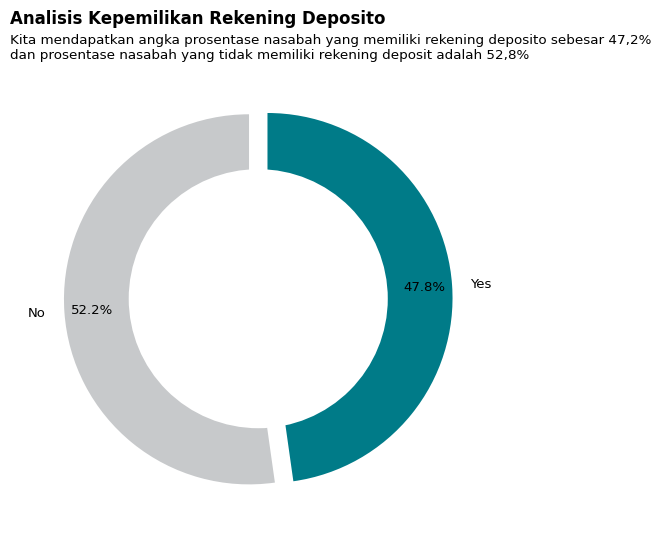

In [14]:
# calculate the customers that have accepted campaign once or more and the customers that never accepted
value_dep = df['deposit'].value_counts()

# initialize plot
fig, ax = plt.subplots(figsize=(5, 5))

# adjust the subplot so that the title would fit
plt.subplots_adjust(top=0.9)

# add title
fig.text(
    0, 1.05, "Analisis Kepemilikan Rekening Deposito", 
    fontsize=12,
    fontweight="bold", 
)

# add subtitle
fig.text(
    0, 0.98, 
    f'''Kita mendapatkan angka prosentase nasabah yang memiliki rekening deposito sebesar 47,2%
dan prosentase nasabah yang tidak memiliki rekening deposit adalah 52,8%''',
    fontsize=9.7, 
    color='black'
)

# create pie chart
plt.pie(value_dep, 
        colors=["#C7C9CB", '#007b88'],
        labels=['No', 'Yes' ], 
        autopct='%1.1f%%', 
        startangle=90, 
        pctdistance=0.85, 
        explode=(0.05, 0.05),
        textprops = {"fontsize": 9.5},
)

# create a circle at the center of the plot
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0, 0), 0.7, fc='white'))

# show
plt.tight_layout()
plt.show()

__Insight :__ 
* Data nasabah yang membuka rekening deposito ada 3732 orang dengan prosentase 47,8% 
* Data nasabah yang tidak membuka rekening deposito ada 4081 orang dengan prosentase 52,2% 
* Target data bisa dikatakan balance karena prosentase yang membuka deposito dan tidak hampir sama

**Outlier** 

Deteksi dan kuantifikasi outlier per kolom:

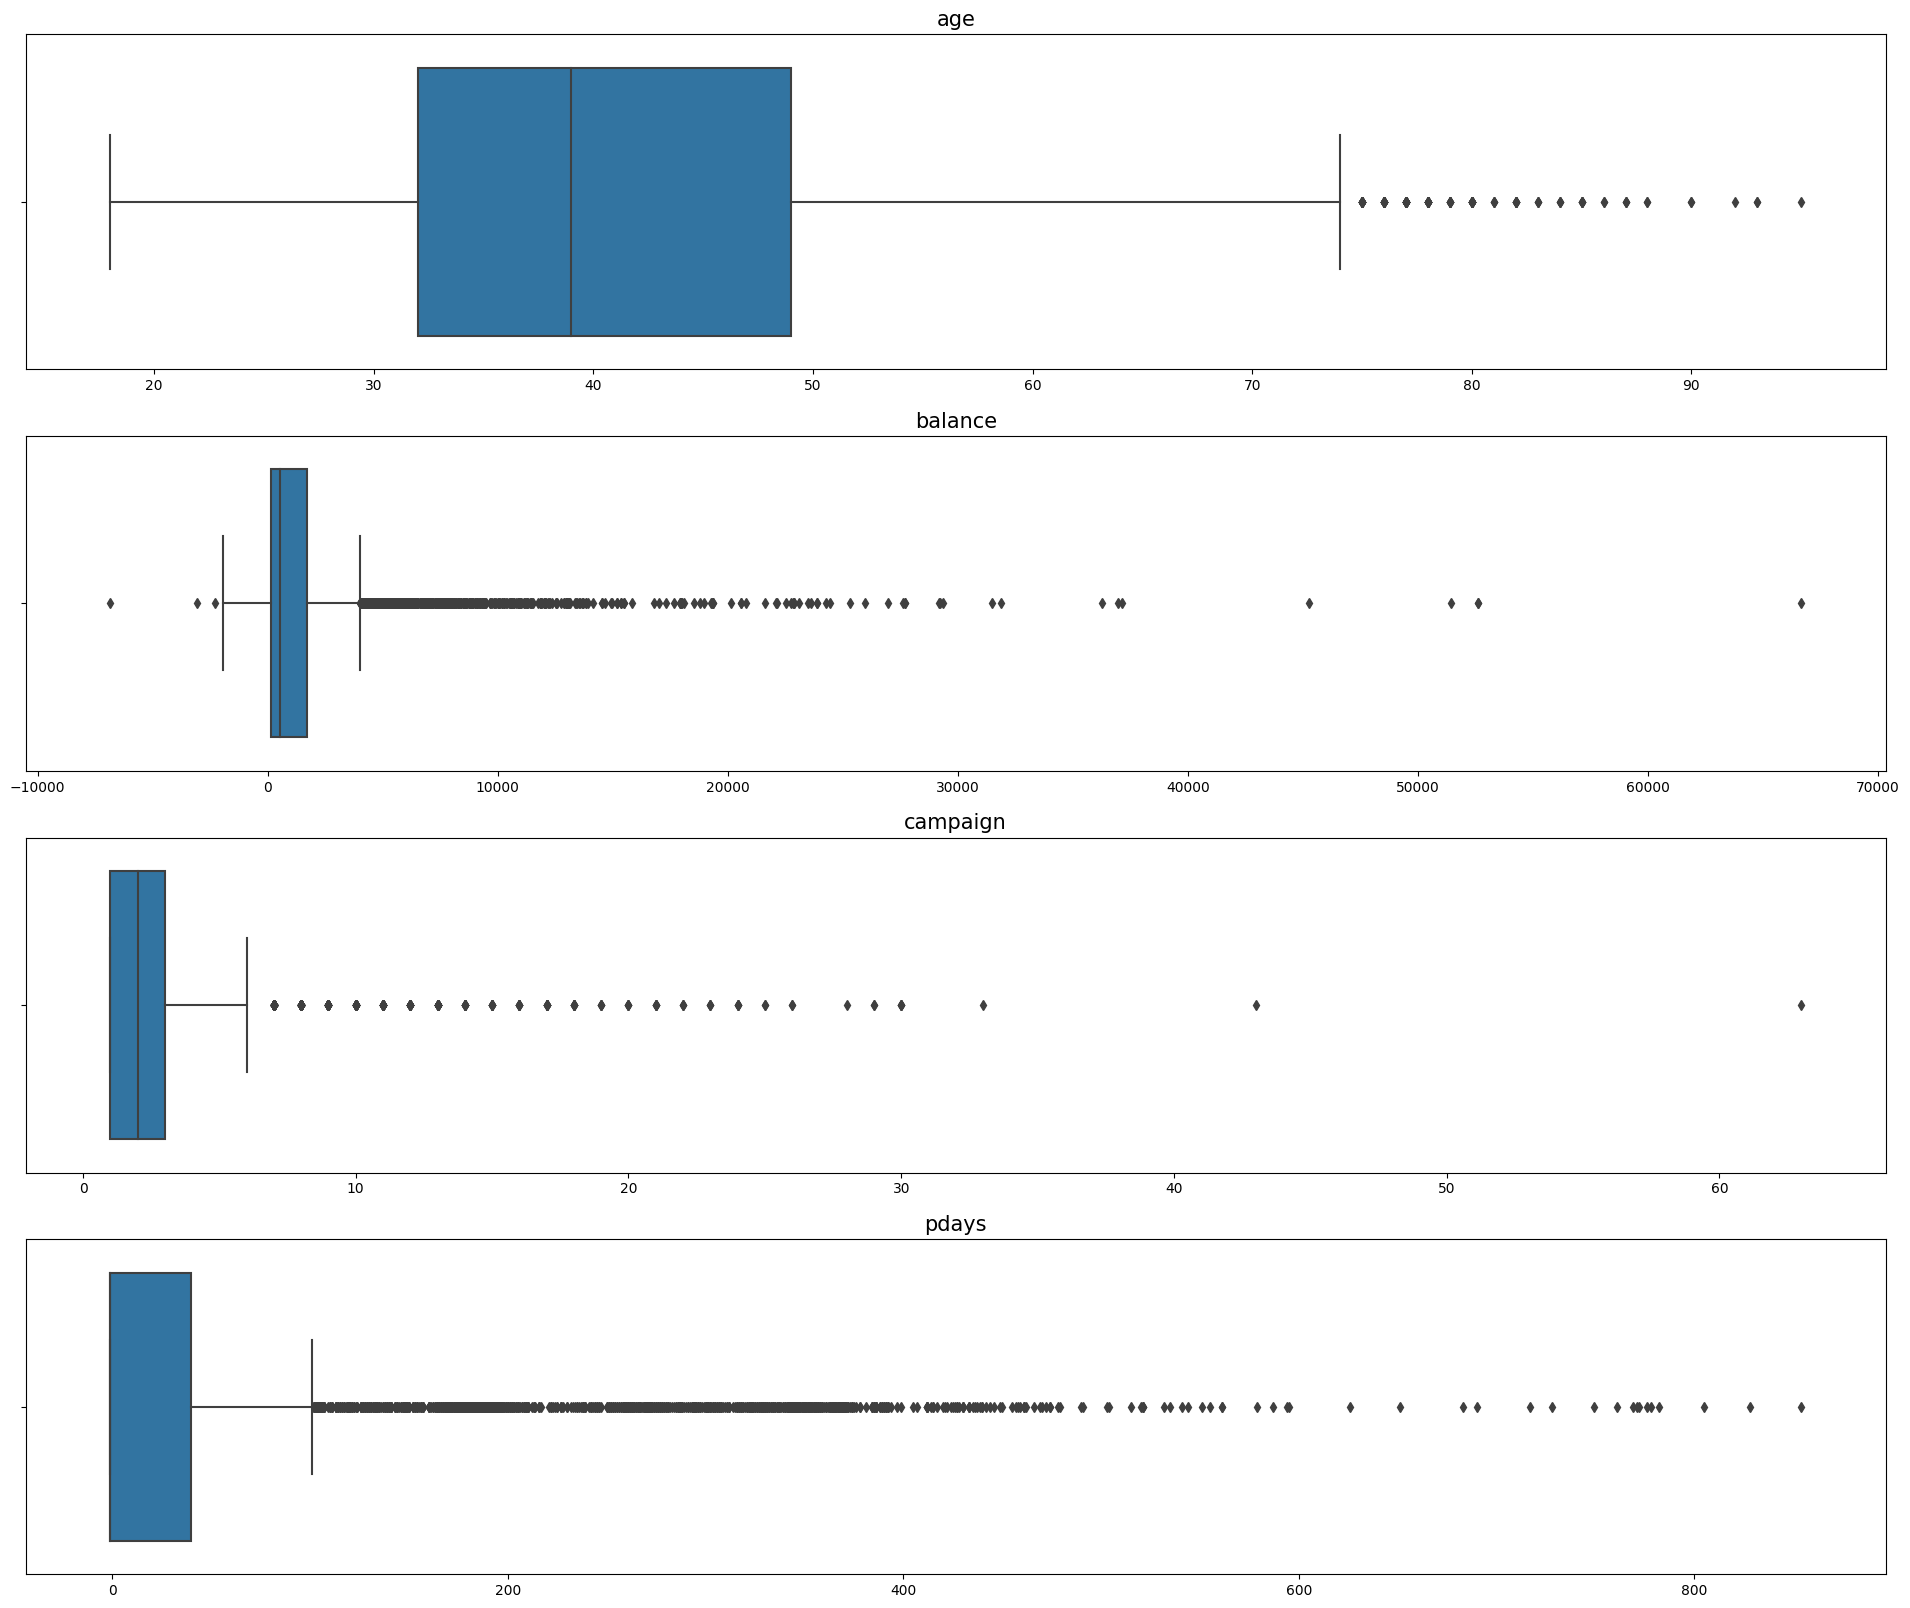

In [15]:
fig, axes = plt.subplots(4, 1, figsize=(24,20))

num_columns = data[['age', 'balance', 'campaign', 'pdays']]

for i, j in zip(num_columns, axes.flatten()):
    # print(i)
    sns.boxplot(data=data, x= i, ax= j)
    j.set_xlabel('')
    j.set_title(i, size= 15)


Deteksi dan kuantifikasi outlier multivariate:

In [16]:
from sklearn.ensemble import IsolationForest
import category_encoders as ce

# #pisahkan target dan feature
# out = data.drop(columns='deposit')

# # encoding kategorikal kolom
# binary_encoder = ce.BinaryEncoder(cols=['job', 'housing',  'loan', 'contact', 'month', 'poutcome'])
# dfbin = binary_encoder.fit_transform(out[['job', 'housing',  'loan', 'contact', 'month', 'poutcome']])

# # Buat model Isolation Forest
# model = IsolationForest(contamination=0.05)  # Tentukan parameter contamination sesuai kebutuhan

# # Latih model dengan data
# model.fit(dfbin)

# # Identifikasi outliers dengan model
# outliers = model.predict(dfbin)
# outliers = data[outliers == -1]
# # print("Outliers:", outliers)
# outliers

In [17]:
data

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [18]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

#pisahkan target dan feature
out = data.drop(columns='deposit')

# encoding kategorikal kolom
binary_encoder = ce.BinaryEncoder(cols=['job', 'housing',  'loan', 'contact', 'month', 'poutcome'])
dfbin = binary_encoder.fit_transform(out[['job', 'housing',  'loan', 'contact', 'month', 'poutcome']])

In [19]:
# from sklearn.metrics import silhouette_score

# kmeans = KMeans(n_clusters=1000)
# cluster = kmeans.fit_predict(dfbin)

# silhouette_score(dfbin, cluster, random_state=22)

In [20]:
# # List untuk menyimpan nilai inertia (varians) dari setiap cluster
# inertia = []
# # Coba jumlah cluster dari 1 hingga 10
# for k in range(1, 301):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(dfbin)
#     inertia.append(kmeans.inertia_)

# # Plot Elbow Method
# plt.plot(range(1, 301), inertia, marker='o')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

In [21]:
# silhouette = []
# cluster = []

# for k in range(2, 101):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(dfbin)
#     silhouette.append(silhouette_score(dfbin, kmeans.labels_))
#     cluster.append(k)
#     # print(f"Number of clusters: {k}, Silhouette Score: {silhouette_avg}")

# df_score = pd.DataFrame(
#     {
#         'n_cluster' : cluster,
#         'silhouette_score' : silhouette
#     }
# )

# sns.lineplot(df_score, x='n_cluster', y='silhouette_score')

In [24]:
from pycaret.anomaly import *

anomaly = setup(session_id =0,
                data=df,
                
                normalize=True,
                normalize_method='zscore')

outknn = create_model('knn', n_neighbors = 30)
df = assign_model(outknn)
plot_model(outknn, plot='umap')

print(f"Jumlah total outliers ada : {len(df[df['Anomaly']== 1])}")


,Description,Value
0,Session id,0
1,Original data shape,"(7813, 11)"
2,Transformed data shape,"(7813, 38)"
3,Ordinal features,3
4,Numeric features,4
5,Categorical features,7
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Jumlah total outliers ada : 391


In [ ]:
# # Buat objek KNN
# k = 30
# knn_model = NearestNeighbors(n_neighbors=k)

# # Latih model KNN dengan data
# knn_model.fit(dfbin)

# # Hitung jarak tetangga terdekat
# distances, indices = knn_model.kneighbors(dfbin)

# threshold = np.mean(distances[:, -1]) * 2  # Ambang batas berdasarkan rata-rata jarak ke tetangga terjauh

# outliers_indices = np.where(distances[:, -1] > threshold)[0]
# outliers = data.iloc[outliers_indices]

# pd.set_option("display.max_rows", 50)
# outliers

In [ ]:
# adddd = data.drop(index=list(outliers_indices))
# adddd

Handling outlier:

In [25]:
df = df[df['Anomaly']== 0]
df = df.drop(columns=['Anomaly', 'Anomaly_Score'])
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7806,53,management,13901,yes,no,cellular,nov,1,-1,unknown,no
7807,33,management,0,yes,yes,cellular,may,2,-1,unknown,no
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


__Insight :__
* ....
* ....
* ....

**Problematic Data Value**

Deteksi dan kuantifikasi data problematik pada kolom pdays :

In [26]:
df[df['pdays'] == -1]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7806,53,management,13901,yes,no,cellular,nov,1,-1,unknown,no
7807,33,management,0,yes,yes,cellular,may,2,-1,unknown,no
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


__Insight :__
* Terdapat data dengan value minus (-) yaitu -1 yang memiliki arti nasabah tersebut tidak pernah dihubungi dilihat dari campaign terakhir sejumlah 5817 data
* Handling problematik data akan dilakukan pada pycaret dengan mengganti -1 menjadi 0 

Deteksi dan kuantifikasi data problematik yang memiliki value unknown :

In [27]:
Columns = []
Unknown = []
percentUnknown = []

for i in cat_columns:
    unknown = df[i].str.contains('unknown').sum()
    Unknown.append(unknown)

    percent_unknown = (unknown / len(df) * 100).round(2)
    percentUnknown.append(percent_unknown)

    Columns.append(i)

pd.DataFrame({
    'Columns' : Columns,
    'Number of unknown' : Unknown,
    '% unknown' : percentUnknown
}
)

,Columns,Number of unknown,% unknown
0,job,8,0.11
1,housing,0,0.00
2,loan,0,0.00
3,contact,1612,21.72
4,month,0,0.00
5,poutcome,5656,76.21


__Insight :__
* Terdapat 54 data dengan value unknown pada column **job** dengan prosentase 0,69%
* Terdapat 1639 data dengan value unknown pada column **contact** dengan prosentase 20.98%
* Terdapat 5819 data dengan value unknown pada column **poutcome** dengan prosentase 74.48%
* Handling problematik data pada column **job** akan dilakukan pada pycaret dengan mengganti unknown menjadi unemployed karena pekerjaannya tidak diketahui maka akan di masukkan pada kategori **unemployed**
* Handling problematik data pada colum **poutcome** akan dilakukan pada pycaret dengan mengganti unknown menjadi other untuk menyederhanakan karena kategori other juga sudah tersedia sebelumnya 
* Pada column **contact** akan tetap dibiarkan unknown karena memang tidak bisa didefinisikan

**Duplicated Value**

Deteksi dan kuantifikasi data duplikat :

In [28]:
df[df.duplicated()]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes


Handling data duplikat :

In [29]:
df = df.drop_duplicates(keep='last', ignore_index=True)

#### **Feature Engineering**

Bagi dataset menjadi train set dan test set:

In [30]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

df_train.shape, df_test.shape

((5931, 11), (1483, 11))

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

class clearAll(BaseEstimator, TransformerMixin):
    
    def _init_(self):
        pass

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Replace value -1 menjadi 0 pada column job
        X["pdays"].replace(-1, 0, inplace=True) 

        # Replace value entrepreneur, student, retired, unknown, dan housemaid pada column job
        X['job'].replace("entrepreneur", "self-employed", inplace= True)
        X['job'].replace("student", "unemployed", inplace= True)
        X['job'].replace("retired", "unemployed", inplace= True)
        X['job'].replace("unknown", "unemployed", inplace= True)
        X['job'].replace("housemaid", "services", inplace= True)

        # Replace value unknown menjadi other pada column poutcome
        X['poutcome'].replace("unknown", "other", inplace= True)
        
        return X.to_numpy()

In [32]:
# Membuat pipeline transformasi

from sklearn.preprocessing import RobustScaler
from pycaret.internal.preprocess.transformers import TransformerWrapper #Melakukan transformer

customPipeline = [
    ("clearAll", TransformerWrapper(exclude=[], transformer=clearAll())),
]

In [37]:
# Setting parameter dasar menggunakan pycaret
# import pycaret
from pycaret.classification import *

clf = setup(
    # general setup
    data=df_train, 
    target='deposit',
    train_size=0.8,
    verbose=True,
    preprocess=True,
    normalize=True,
    normalize_method='robust',
    # feature setup
    # ignore_features=[],

    # experiment setup
    session_id=42,
    log_experiment=True, 
    log_data=True,
    log_plots=True,

    # data wrangling
    imputation_type=None, 
    # remove_outliers=True,
    # outliers_method='lof',
    # outliers_threshold=0.1,
    custom_pipeline=customPipeline,
    custom_pipeline_position=0,
)

,Description,Value
0,Session id,42
1,Target,deposit
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(5931, 11)"
5,Transformed data shape,"(5931, 32)"
6,Transformed train set shape,"(4744, 32)"
7,Transformed test set shape,"(1187, 32)"
8,Ordinal features,2
9,Numeric features,4


In [38]:
pd.set_option("display.max_columns", 500)

In [39]:
get_config('X_test_transformed')

,age,job_self-employed,job_admin.,job_technician,job_blue-collar,job_services,job_unemployed,job_management,balance,housing,loan,contact_cellular,contact_unknown,contact_telephone,month_nov,month_jul,month_jun,month_may,month_aug,month_mar,month_feb,month_apr,month_oct,month_jan,month_sep,month_dec,campaign,pdays,poutcome_failure,poutcome_other,poutcome_success
6941,0.9375,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.319615,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,337.0,1.0,-1.0,0.0
3944,-0.4375,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.538666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6056,-0.3750,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.115168,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,-1.0,0.0
6652,-0.1250,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.130767,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
563,-0.1875,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.052108,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5704,-0.4375,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.209426,1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0
2478,-0.2500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.814803,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0
448,0.1250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.461666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0
5947,-0.1875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.016263,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Proses scaling dan encoding:

Feature Creation:

Feature Selection:

### `Modeling`

**Model Experiment**

Bandingkan model regresi atau klasifikasi untuk mendapatkan benchmark model:

In [40]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:19:00
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7247,0.7766,0.5869,0.7686,0.6650,0.4384,0.4503,2.6550
lightgbm,Light Gradient Boosting Machine,0.7146,0.7655,0.5982,0.7400,0.6611,0.4194,0.4269,2.7320
ada,Ada Boost Classifier,0.7093,0.7610,0.5860,0.7376,0.6524,0.4082,0.4168,2.5280
lr,Logistic Regression,0.7068,0.7611,0.5833,0.7340,0.6495,0.4031,0.4114,2.9300
ridge,Ridge Classifier,0.7030,0.0000,0.5760,0.7305,0.6437,0.3951,0.4037,2.2880
lda,Linear Discriminant Analysis,0.7026,0.7603,0.5751,0.7302,0.6431,0.3942,0.4028,2.3890
xgboost,Extreme Gradient Boosting,0.6998,0.7520,0.6136,0.7049,0.6553,0.3918,0.3954,2.6590
rf,Random Forest Classifier,0.6958,0.7548,0.6095,0.6996,0.6510,0.3837,0.3869,2.9850
et,Extra Trees Classifier,0.6691,0.7260,0.5982,0.6598,0.6272,0.3310,0.3325,2.7770
knn,K Neighbors Classifier,0.6661,0.7095,0.5851,0.6608,0.6198,0.3242,0.3267,2.4150


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [41]:
gbc = create_model('gbc', cross_validation=False, return_train_score=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.7102,0.7458,0.5407,0.7686,0.6348,0.4064,0.4238
Train,0.7532,0.8176,0.6167,0.8079,0.6995,0.4964,0.5094


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [43]:
en_gbc = ensemble_model(
    estimator=gbc,
    method='Bagging',
    optimize='MCC',
    probability_threshold=0.35,
    verbose=False
)

parameters = {
    'n_estimators': [10, 50, 100, 150, 200, 250, 300],
}

tuned_gbc = tune_model(
    estimator=en_gbc, 
    optimize='Prec.', 
    n_iter=10, 
    custom_grid=parameters, 
    search_library='scikit-learn',
    search_algorithm='random', 
    return_train_score=True
)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [44]:
lr = create_model('lr', cross_validation=False, return_train_score=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.6824,0.7171,0.5118,0.7256,0.6002,0.3496,0.3643
Train,0.7125,0.7668,0.5873,0.7417,0.6556,0.4145,0.4228


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [47]:
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
    'C': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
    'max_iter': [100, 500, 1000],
}

tuned_lr = tune_model(lr, optimize='MCC', choose_better=True, n_iter=30, search_algorithm='random', return_train_score=True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [ ]:
# evalmod = evaluate_model(a)

In [ ]:
# afix = create_model('gbc', probability_threshold=0.32, max_depth = 4)

In [ ]:
# atune = tune_model(a, optimize='MCC')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:02:28
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7031,0.7566,0.5238,0.7806,0.6269,0.3958,0.4176
1,0.7113,0.7735,0.5584,0.7725,0.6482,0.4140,0.4297
2,0.6948,0.7595,0.5152,0.7677,0.6166,0.3791,0.3999
3,0.7155,0.7607,0.5541,0.7853,0.6497,0.4219,0.4402
4,0.7423,0.7989,0.5991,0.8129,0.6898,0.4779,0.4942
5,0.7237,0.7811,0.5517,0.8101,0.6564,0.4390,0.4617
6,0.7149,0.7866,0.5584,0.7818,0.6515,0.4214,0.4385
7,0.7045,0.7562,0.5368,0.7750,0.6343,0.3998,0.4189
8,0.7459,0.7921,0.6190,0.8034,0.6993,0.4856,0.4979


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
b = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7200,0.7577,0.5917,0.7717,0.6698,0.4340,0.4456
1,0.7000,0.7622,0.5833,0.7368,0.6512,0.3942,0.4025
2,0.6820,0.7464,0.5542,0.7189,0.6259,0.3573,0.3665
3,0.7160,0.7655,0.6083,0.7526,0.6728,0.4269,0.4344
4,0.7120,0.7794,0.5708,0.7697,0.6555,0.4173,0.4311
5,0.7114,0.7815,0.6109,0.7411,0.6697,0.4177,0.4238
6,0.6934,0.7521,0.5958,0.7186,0.6515,0.3820,0.3874
7,0.7074,0.7656,0.6250,0.7282,0.6726,0.4109,0.4148
8,0.6874,0.7541,0.5792,0.7165,0.6406,0.3694,0.3760


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evallr = evaluate_model(b)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
bLr = create_model('lr', class_weight={0: 0.4, 1: 0.6})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6440,0.7575,0.7667,0.6013,0.6740,0.2943,0.3049
1,0.6440,0.7620,0.7625,0.6020,0.6728,0.2941,0.3041
2,0.6540,0.7456,0.7458,0.6151,0.6742,0.3125,0.3191
3,0.6780,0.7660,0.7958,0.6304,0.7035,0.3614,0.3733
4,0.6820,0.7803,0.7583,0.6431,0.6960,0.3673,0.3728
5,0.6794,0.7809,0.8368,0.6231,0.7143,0.3664,0.3874
6,0.6693,0.7514,0.7542,0.6307,0.6869,0.3424,0.3486
7,0.6673,0.7627,0.7792,0.6233,0.6926,0.3398,0.3499
8,0.6673,0.7537,0.7667,0.6259,0.6891,0.3392,0.3473


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
atune = tune_model(bLr, optimize='MCC')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:28:17
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7260,0.7582,0.6042,0.7754,0.6792,0.4464,0.4570
1,0.7060,0.7618,0.5875,0.7460,0.6573,0.4062,0.4151
2,0.6800,0.7494,0.5542,0.7151,0.6244,0.3534,0.3621
3,0.7180,0.7639,0.6125,0.7538,0.6759,0.4310,0.4383
4,0.7100,0.7774,0.5750,0.7624,0.6556,0.4135,0.4258
5,0.7054,0.7824,0.6109,0.7300,0.6651,0.4059,0.4110
6,0.6954,0.7534,0.5958,0.7222,0.6530,0.3860,0.3916
7,0.7114,0.7689,0.6250,0.7353,0.6757,0.4188,0.4233
8,0.6834,0.7546,0.5875,0.7050,0.6409,0.3619,0.3667


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# a = compare_models()
# b = pull()

# print(b)


In [ ]:
# type(b)

Lakukan optimasi model benchmark:

Validasi silang 10-fold untuk mendapatkan rentang kinerja model:

**Model Evaluation**

**Model Intepretation**

* .....
* .....
* .....

**Model Limitation**

* .....
* .....
* .....


### `Conclusion`

Beberapa hal yang dapat disimpulkan yaitu:

* ....
* ....
* ....

### `Recommendations`

Hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

* ....
* ....
* ....